In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import pi, degrees, radians, sin, cos, tan, asin, acos, atan, atan2

from Implementation import *

In [2]:
imagesDir = os.path.join("..\\..\\", "images", "Binary")
walk      = list(os.walk(imagesDir))
filenames = walk[0][2]
images = [file for file in filenames if ".png" in file]
singleObjectImages = [filename for filename in images if "Single"   in filename]
singleObjectImages

['SingleObject1.png',
 'SingleObject2.png',
 'SingleObject3.png',
 'SingleObject4.png',
 'SingleObject5.png']

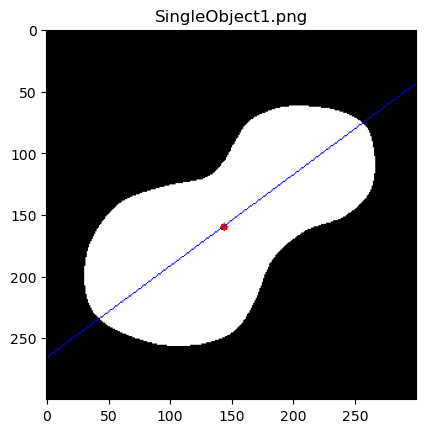

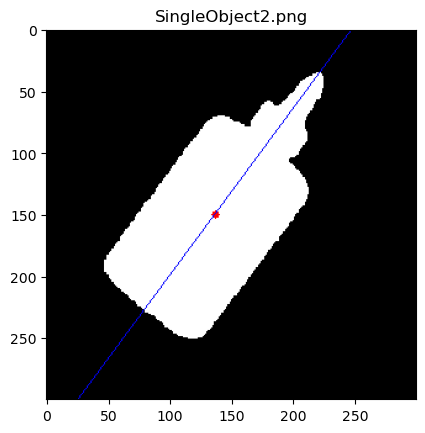

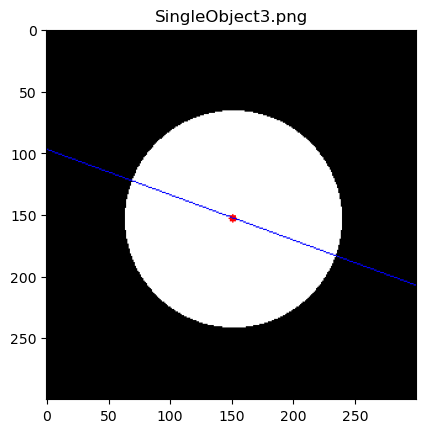

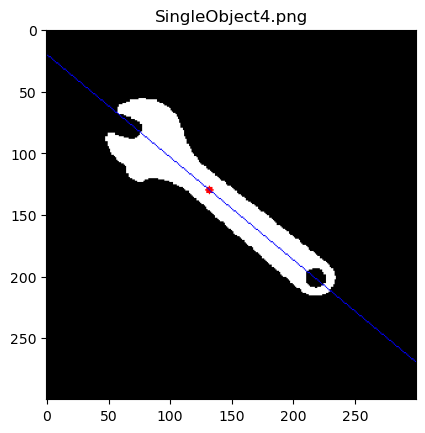

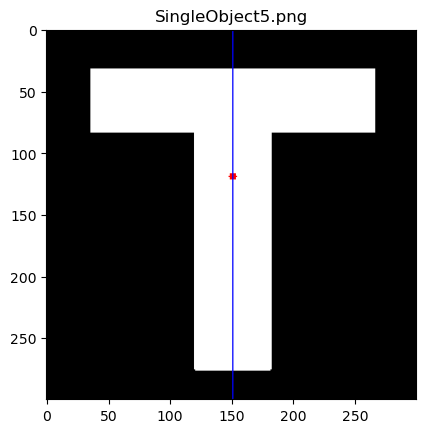

In [3]:
for imageName in singleObjectImages:
    imagePath  = os.path.join(imagesDir, imageName)
    image      = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
    
    centeroid  = getCenteroid(image)
    theta_Emin = getThetaEmin(image, centeroid)
    p1, p2     = getFullAxisPoints(image, centeroid, theta_Emin)

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 
    image = cv2.circle(image, centeroid, radius=0, color=(255, 0, 0), thickness=5)
    image = cv2.line(image, p1, p2, color=(0, 0, 255), thickness=1)
    plt.figure()
    plt.title(imageName)
    plt.imshow(image, cmap=plt.cm.gray)